In [27]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

From the description, we know there are two kinds of features in our dataset, continuous and category.(except id and loss).

In [5]:
category = []
contin = []
for i in train.columns:
    if 'cat' in i:
        category.append(i)
    elif 'cont' in i:
        contin.append(i)

print len(category)
print len(contin)

116
14


The number of category variables is much more than number of continuous variables. Before next step, we need to make sure if there is NA value or duplicate in dataset.

In [16]:
for i in train.columns:
    s = sum(train[i].isnull())
    if s>0 :
        print "{0} has {1} Na values".format(i, s)
s = sum(train.duplicated())
print "This dataset has {0} duplicated observation".format(s)

This dataset has 0 duplicated observation


Great, there is no NA or duplicated data. Then we want to explore the distribution of our loss feature.

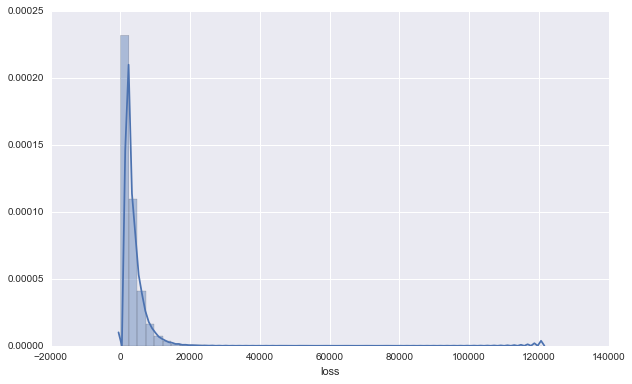

In [26]:
plt.figure(figsize = (10,6))
sns.distplot(train['loss'])

It's a very skewed data and it need to be preprocessed before any exploration. Let's try to use log function

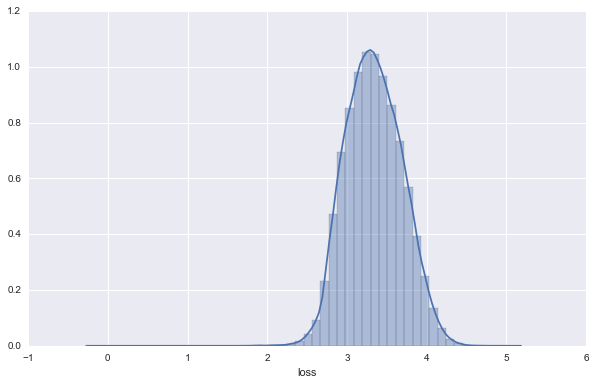

In [29]:
plt.figure(figsize = (10,6))
sns.distplot(np.log10(train['loss']))

It's a beatiful norm distribution. We made the correct choice. Okay, it's time to explor more the category variables.

In [22]:
for i in category:
    print i+":"+"{}".format(train[i].nunique())

cat1:2
cat2:2
cat3:2
cat4:2
cat5:2
cat6:2
cat7:2
cat8:2
cat9:2
cat10:2
cat11:2
cat12:2
cat13:2
cat14:2
cat15:2
cat16:2
cat17:2
cat18:2
cat19:2
cat20:2
cat21:2
cat22:2
cat23:2
cat24:2
cat25:2
cat26:2
cat27:2
cat28:2
cat29:2
cat30:2
cat31:2
cat32:2
cat33:2
cat34:2
cat35:2
cat36:2
cat37:2
cat38:2
cat39:2
cat40:2
cat41:2
cat42:2
cat43:2
cat44:2
cat45:2
cat46:2
cat47:2
cat48:2
cat49:2
cat50:2
cat51:2
cat52:2
cat53:2
cat54:2
cat55:2
cat56:2
cat57:2
cat58:2
cat59:2
cat60:2
cat61:2
cat62:2
cat63:2
cat64:2
cat65:2
cat66:2
cat67:2
cat68:2
cat69:2
cat70:2
cat71:2
cat72:2
cat73:3
cat74:3
cat75:3
cat76:3
cat77:4
cat78:4
cat79:4
cat80:4
cat81:4
cat82:4
cat83:4
cat84:4
cat85:4
cat86:4
cat87:4
cat88:4
cat89:8
cat90:7
cat91:8
cat92:7
cat93:5
cat94:7
cat95:5
cat96:8
cat97:7
cat98:5
cat99:16
cat100:15
cat101:19
cat102:9
cat103:13
cat104:17
cat105:20
cat106:17
cat107:20
cat108:11
cat109:84
cat110:131
cat111:16
cat112:51
cat113:61
cat114:19
cat115:23
cat116:326


We can see most of these features only have two variables. We want to divide these feature into three group: 2 variables, 3-10 variables and more than 10 variables.

In [49]:
four = []
ten =[]
more = []
for i in category:
    if train[i].nunique() < 5:
        two.append(i)
    elif train[i].nunique()>10:
        more.append(i)
    else:
        ten.append(i)
print len(two)
print len(ten)
print len(more)

160
11
17


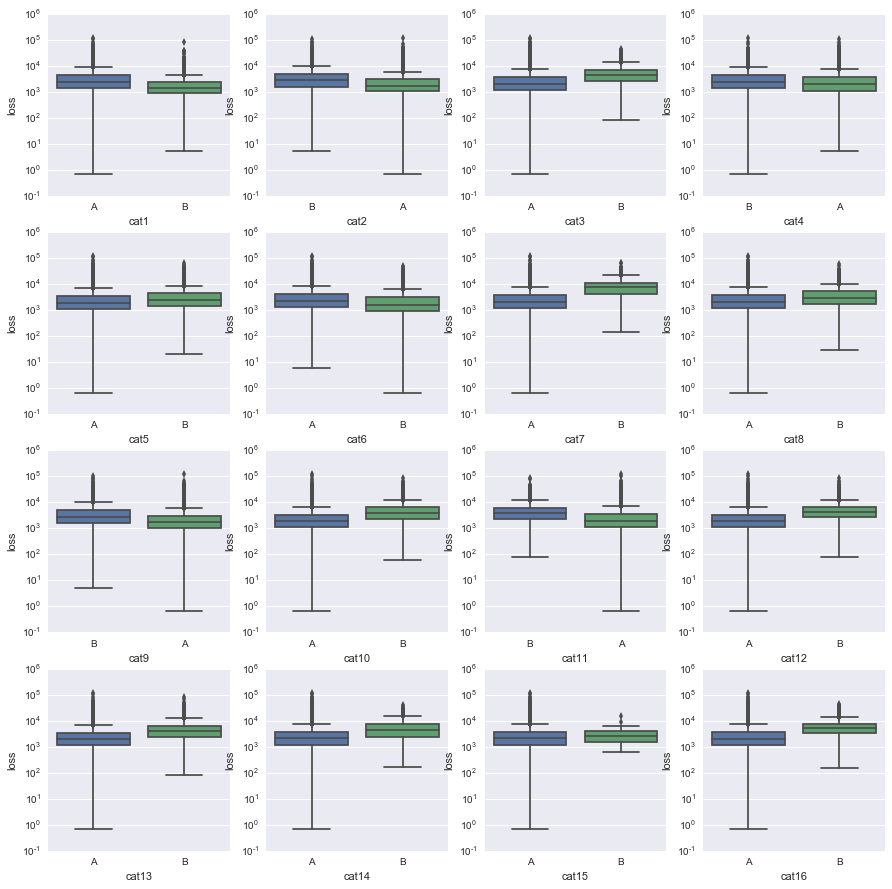

In [50]:
f, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (15,15))
s = 0
for i in range(4):
    for j in range(4):
        axis[i][j].set(yscale = 'log')
        sns.boxplot(x = two[s], y = 'loss', data = train, ax = axis[i][j])
        s += 1

We take 16 features as example and the rest of them have similar distribution. We can't get lot valuable information from these plot by now. We will explot these features more deeply next time. How about features in group 5?

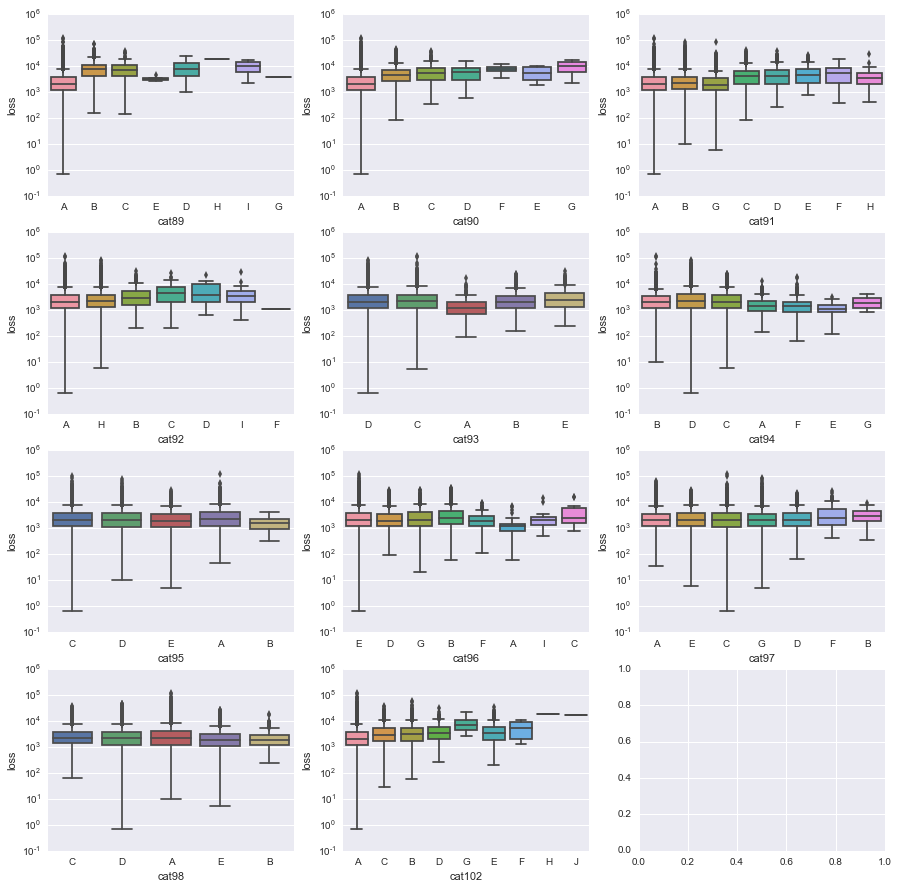

In [53]:
f, axis = plt.subplots(ncols= 3, nrows = 4, figsize= (15,15))
s = 0
for i in range(4):
    for j in range(3):
        if s >10:
            break
        axis[i][j].set(yscale = 'log')
        sns.boxplot(x = ten[s], y = 'loss', data = train, ax = axis[i][j])
        s += 1

What we can see by now is that some types have less outliers than others. Is that mean they are stable variables?  
We will explore rest of these category variables next time. We also want to check the continuous variables

In [55]:
train[contin].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


All these features range from 0 to 1. It's strange that means of all of them are very close to 0.5. Does this reflect something?


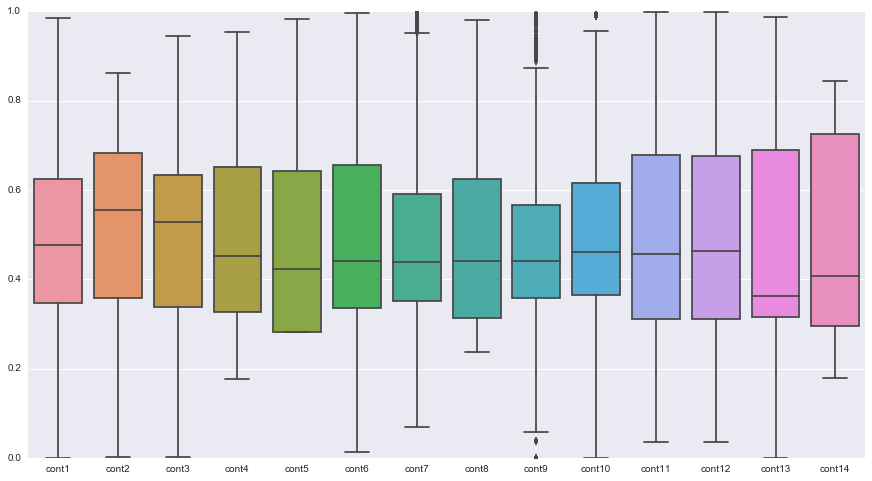

In [58]:
plt.figure(figsize= (15,8))
sns.boxplot(train[contin])

It's clear that their median can be very different. We also notice that some of them have highly skewed distribution, especially for con13 and con14.

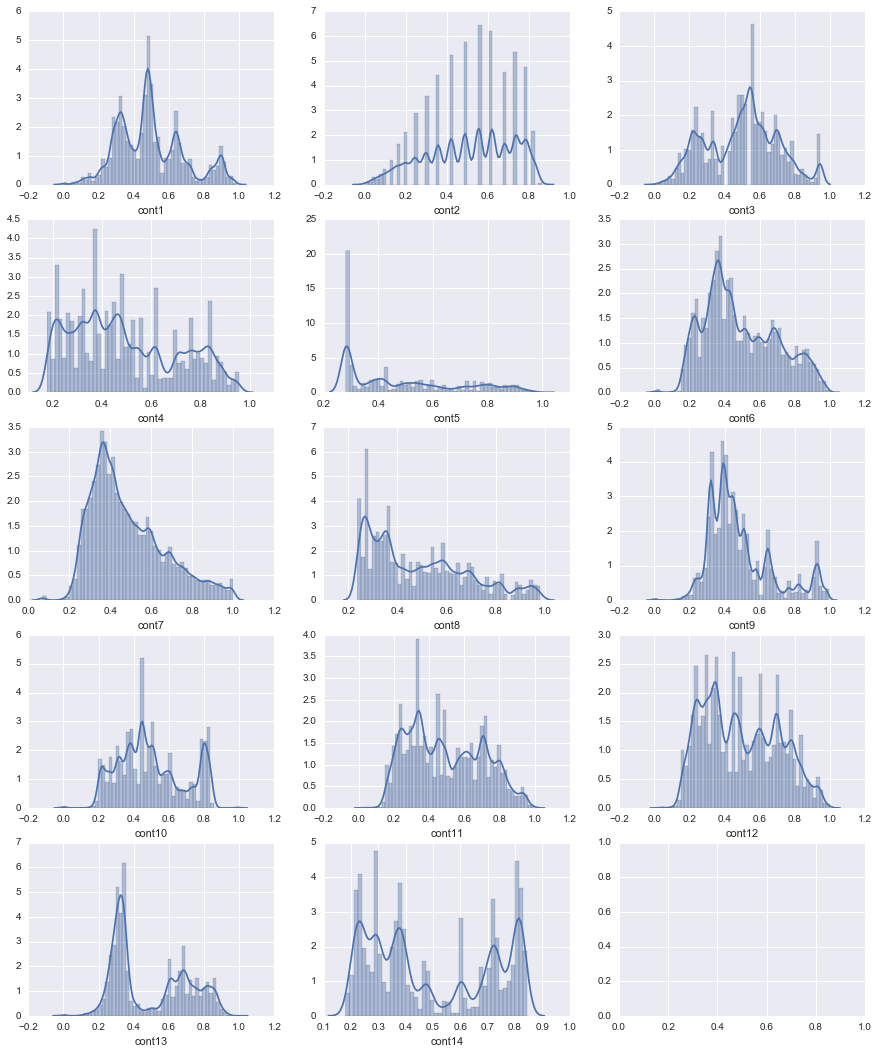

In [64]:
f, axis = plt.subplots(figsize= (15,18), ncols = 3, nrows = 5)
s = 0
for i in range(5):
    for j in range(3):
        if s>13:
            break
        sns.distplot(train[contin[s]],ax = axis[i][j])
        s += 1

We can find some information from these plots:
1. cont2 is different from others. From its distribution, we can get it may derived from category variable.
2. Some of these plots,(cont14, cont12), exist multiple peaks
3. We also can find obvious gap in these distributions.
4. A lot of them are skewed data.


The final step in this overview EDA is the correlation.

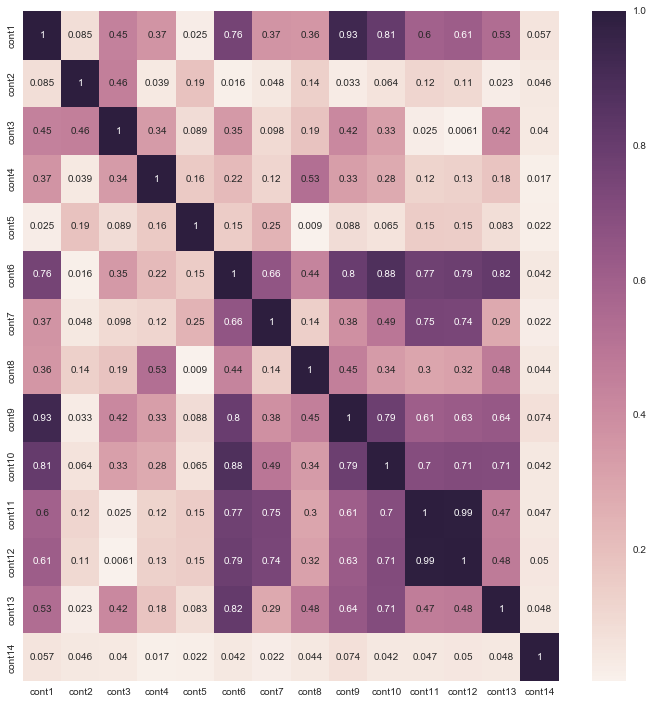

In [67]:
correlation = train[contin].corr().abs()
plt.figure(figsize = (12,12))
sns.heatmap(correlation, annot = True)

Wow, some of them are really highly correlated. cont11 and con12 are even reach 0.99. We mush do something before we apply regression.